In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import h5py as h5
import numpy as np
import os

import sys
sys.path.append("../")
sys.path.append("../../ASTERIA/python/")
from ic_sn_hnl.units import units

In [6]:
# def find_first_spike(arr: np.ndarray, thresh=1e10):
#     for idx, (v1, v2) in zip(arr, arr[1:]):
#         if v2 / v1 < thresh:
#             continue
#         return idx
#     return 0

In [12]:
infile = "./dphi-dEdt-100MeV-gn11dot8-100s-nf.csv"
outfile = "./fluxes.h5"

if not os.path.exists(outfile):
    with h5.File(outfile, "w") as _:
        pass

key = infile.split("/")[-1].replace(".csv", "")

arr = np.genfromtxt(infile, delimiter=",")
times = np.sort(np.unique(arr[:, 0])) * units["second"]
energies = np.sort(np.unique(arr[:, 1])) * units["MeV"]
fluxes = np.empty(times.shape + energies.shape + (3,),)

for idx in range(len(times)):
    flux = arr[idx*len(energies):(idx+1)*len(energies), 2] / units["MeV"] / units["second"]
    flux = np.where(flux >= 0, flux, 0) # Sometimes numerical issues can sneak in to give negative fluxes
    fluxes[idx, :, 0] = flux # nue
    fluxes[idx, :, 1] = flux # nuebar
    fluxes[idx, :, 2] = flux # nux per flavor

with h5.File(outfile, "r+") as h5f:
    
    if key in h5f.keys():
        del h5f[key]
    
    h5f.create_group(key)
    h5f[key].create_dataset("energies", data=energies)
    h5f[key].create_dataset("times", data=times)
    h5f[key].create_dataset("fluxes", data=fluxes)
    # add meta data if you want
    h5f[key].attrs["mass"] = 150*units["MeV"]
    h5f[key].attrs["log_coupling"] = -14

In [14]:
idx = np.argwhere(times==10)[0][0]

In [15]:
flux = arr[idx*len(energies):(idx+1)*len(energies), 2]

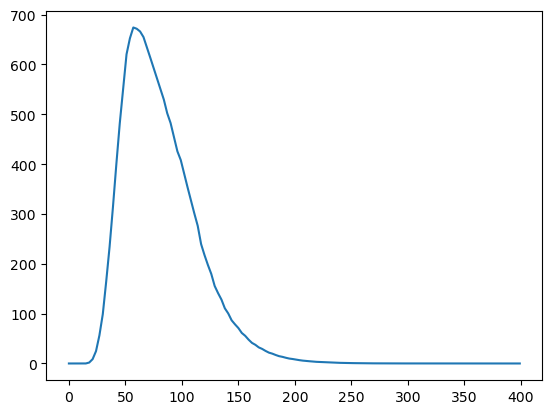

In [19]:
plt.plot(energies, flux)

In [18]:
import matplotlib.pyplot as plt